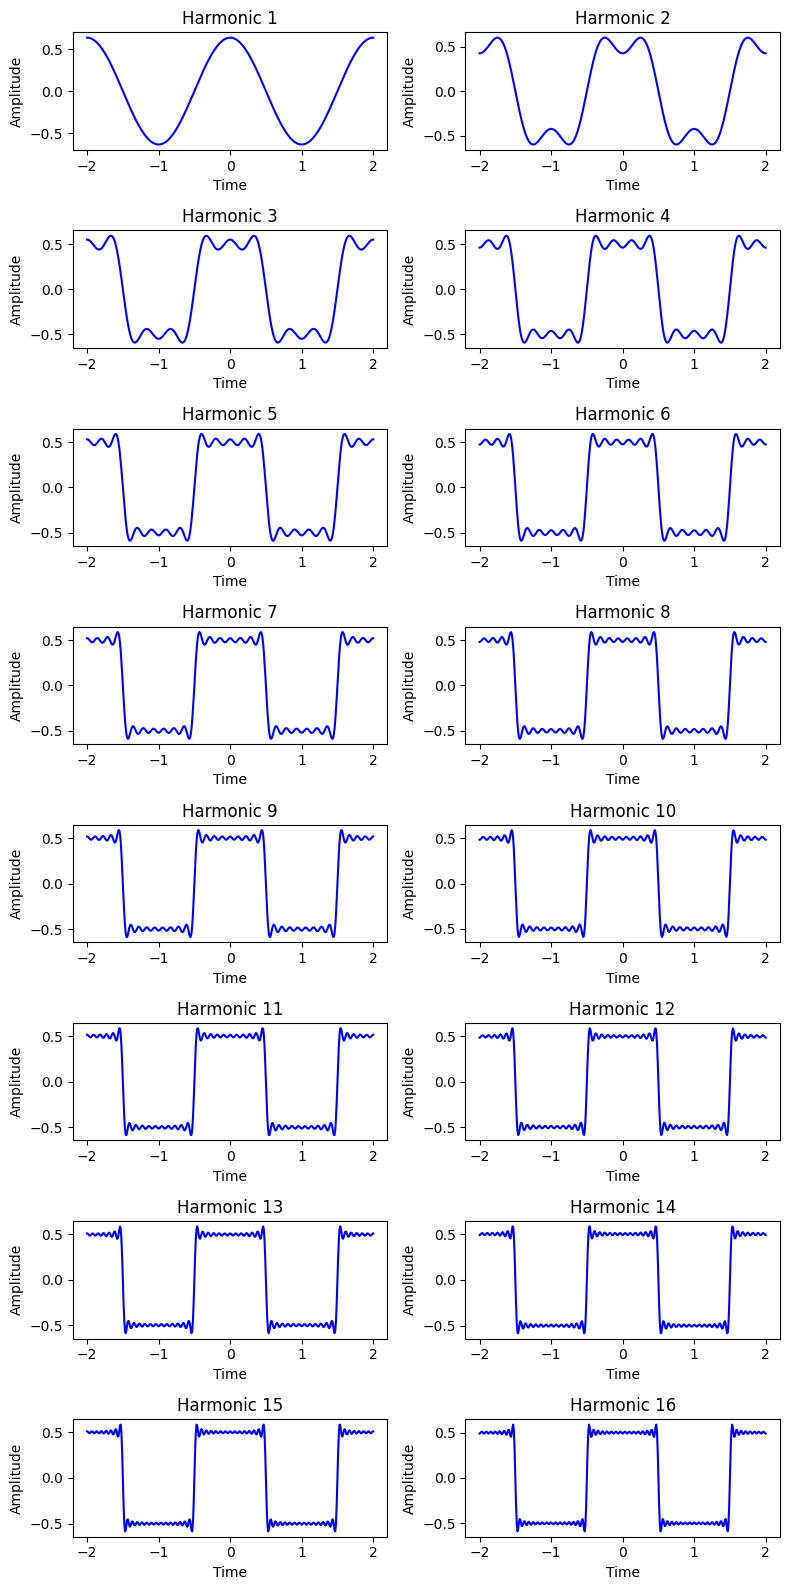

In [16]:
import numpy as np
import matplotlib.pyplot as plt

N = 8 * 2
t = np.arange(-2, 2.01, 0.01)
A = 0.25
T = 2
nh = (np.arange(1, N + 1) * 2 - 1)
harmonics = np.cos(2 * np.pi * nh[:, np.newaxis] * t / T)
Am = 2 / np.pi / nh
Am[1::2] = -Am[1::2]

s1 = harmonics * Am[:, np.newaxis]
s2 = np.cumsum(s1, axis=0)

plt.figure(figsize = (8, 16))
for k in range(N):
    plt.subplot(8, 2, k + 1)
    plt.plot(t, s2[k, :], c = 'b')
    plt.title(f'Harmonic {k + 1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

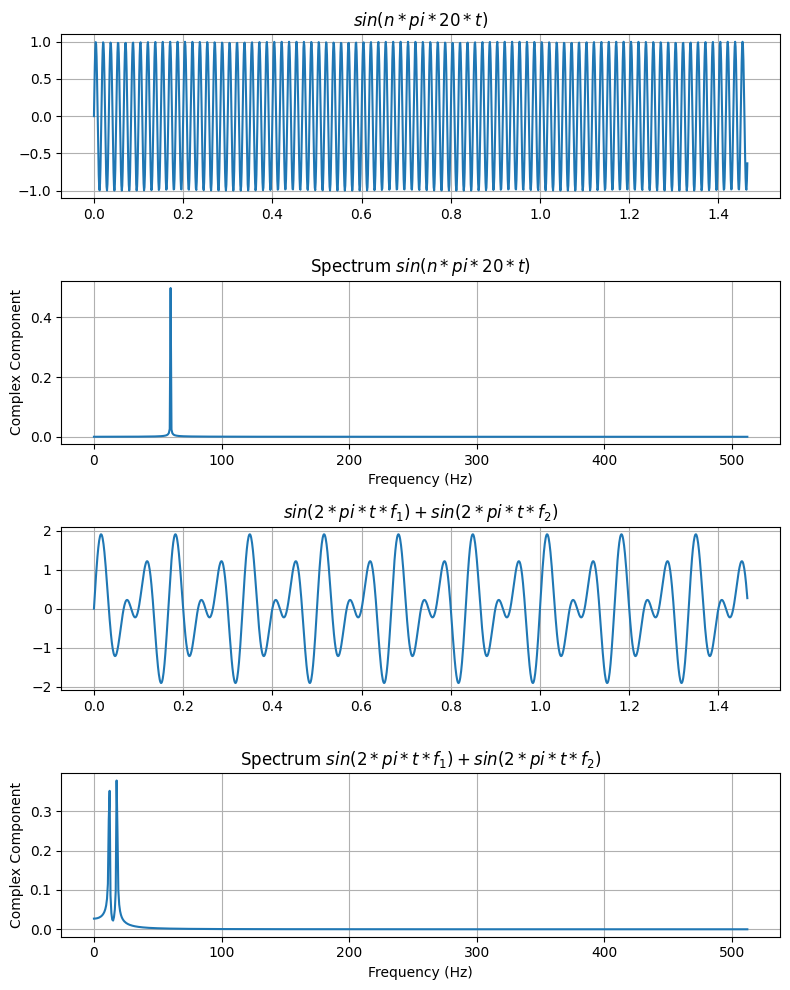

In [30]:
n = 6
N = 1500
Fs = 1024
t = np.arange(0, N + 1) / Fs

y1 = np.sin(n * np.pi * 20 * t)

plt.figure(figsize = (8, 10))
plt.subplot(4, 1, 1)
plt.plot(t, y1)
plt.title('$sin(n*pi*20*t)$')
plt.grid(True)

f = Fs * np.arange(0, N / 2 + 1) / N

spect1 = np.fft.fft(y1)
P2 = np.abs(spect1 / N)
P1 = P2[: int(N / 2) + 1]

plt.subplot(4, 1, 2)
plt.plot(f, P1)
plt.title('Spectrum $sin(n*pi*20*t)$')
plt.grid(True)
plt.ylabel('Complex Component')
plt.xlabel('Frequency (Hz)')

f1 = n * 3
f2 = n * 2
y2 = np.sin(2 * np.pi * t * f1) + np.sin(2 * np.pi * t * f2)

plt.subplot(4, 1, 3)
plt.plot(t, y2)
plt.title('$sin(2*pi*t*f_1) + sin(2*pi*t*f_2)$')
plt.grid(True)

spect2 = np.fft.fft(y2)
P2 = np.abs(spect2 / N)
P1 = P2[: int(N / 2) + 1]

plt.subplot(4, 1, 4)
plt.plot(f, P1)
plt.title('Spectrum $sin(2*pi*t*f_1) + sin(2*pi*t*f_2)$')
plt.grid(True)
plt.ylabel('Complex Component')
plt.xlabel('Frequency (Hz)')

plt.tight_layout()
plt.show()


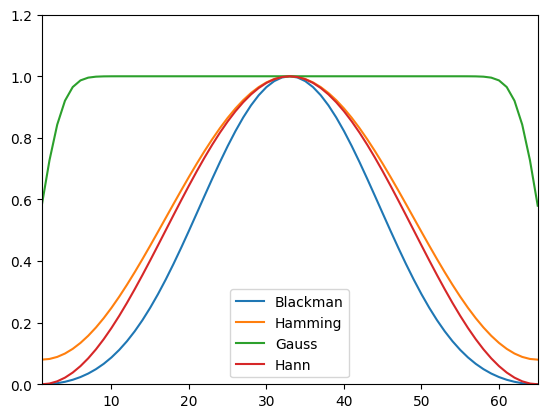

In [42]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import triang

N = 65
w = np.blackman(N)
w1 = np.hamming(N)
w2 = gaussian_filter1d(np.ones(N), sigma = 2.5, mode = 'constant')
w5 = np.hanning(N)

plt.plot(np.arange(1, N + 1), np.vstack([w, w1, w2, w5]).T)
plt.xlim(-2, 2)
plt.axis([1, N, 0, 1.2])
plt.legend(['Blackman', 'Hamming', 'Gauss', 'Hann'])
plt.show()